In [10]:
import h2o
import numpy as np #to efficiently compute functions
import pandas as pd #to work with data frames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import zipfile #to open zipfile
pd.set_option('display.max_columns', 35) #to display 35 columns
pd.set_option('display.max_rows', 100) #to display 100 rows
from ydata_profiling import ProfileReport
import os

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.381-b09, mixed mode)
  Starting server from C:\Users\alexg\AppData\Local\Programs\Python\Python38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\alexg\AppData\Local\Temp\tmp2ugbzazh
  JVM stdout: C:\Users\alexg\AppData\Local\Temp\tmp2ugbzazh\h2o_alexg_started_from_python.out
  JVM stderr: C:\Users\alexg\AppData\Local\Temp\tmp2ugbzazh\h2o_alexg_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_alexg_d68ck2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.507 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML

In [11]:
train_zip_path = 'train_data.csv.zip'
test_zip_path = 'test_data.csv.zip'

# open csv file from zip
def read_zipped_csv(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        csv_filename = z.namelist()[0]
        
        with z.open(csv_filename) as f:
            return pd.read_csv(f)

train_df = read_zipped_csv(train_zip_path)
test_df = read_zipped_csv(test_zip_path)
""" 
print("Train Data:")
print(train_df.head())
print("Test Data:")
print(test_df.head())  """

' \nprint("Train Data:")\nprint(train_df.head())\nprint("Test Data:")\nprint(test_df.head())  '

In [15]:
train_df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [16]:
X_train , X_test, y_train, y_test = train_test_split(train_df.drop(columns=['Claim Injury Type']), train_df['Claim Injury Type'], test_size=0.2, random_state=42)

In [20]:
X_train = X_train.drop('Claim Identifier', axis=1)

In [21]:
aml = H2OAutoML(max_models=10, seed = 10 , exclude_algos=['StackedEnsemble', 'DeepLearning'], verbosity="info", nfolds=0)

In [24]:
# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Convert pandas DataFrames to H2OFrames
training_frame = h2o.H2OFrame(train_df)
validation_frame = h2o.H2OFrame(test_df)

# Define the target and features
x = X_train.columns.tolist()
y = 'Claim Injury Type'

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
# Train the model

aml.train(x=x, y=y, training_frame=training_frame, validation_frame=validation_frame)

AutoML progress: |
16:04:06.26: Project: AutoML_1_20241106_160406
16:04:06.26: Cross-validation disabled by user: no fold column nor nfolds > 1.
16:04:06.27: Setting stopping tolerance adaptively based on the training frame: 0.001451294740596166
16:04:06.27: Build control seed: 10
16:04:06.27: training frame: Frame key: AutoML_1_20241106_160406_training_Key_Frame__upload_b91c2cbfc004af32ce6bb22963e241ff.hex    cols: 32    rows: 474776  chunks: 35    size: 34202826  checksum: 2738228822042061110
16:04:06.27: validation frame: Frame key: Key_Frame__upload_87c4ccf5cb8b29346b30e126b91d4075.hex    cols: 33    rows: 118695  chunks: 9    size: 9171928  checksum: 5683256690309732508
16:04:06.27: leaderboard frame: Frame key: Key_Frame__upload_87c4ccf5cb8b29346b30e126b91d4075.hex    cols: 33    rows: 118695  chunks: 9    size: 9171928  checksum: 5683256690309732508
16:04:06.27: blending frame: NULL
16:04:06.27: response column: Claim Injury Type
16:04:06.27: fold column: null
16:04:06.27: weigh

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20241106_160406


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    135                1215                        1.26405e+06            6            6            5.78354       1             64            52.2617

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.1322185092503756
RMSE: 0.363618631605114
LogLoss: 0.4238102659093432
Mean Per-Class Error: 0.2598751178810194
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1. CANCELLED    2. NON-COMP    3. MED ONLY    4. TEMPORARY    5. PPD SCH LOSS    6. PPD NSL    7. PTD    8. DEATH    nan    Error      Rate
--------------  -------------  -------------  --------------  -----------------  ------------  --------  ----------  -----  ---------  ----------------
6127            3577           214            76              20                 0             0         0           0      0.388157   3.887 / 10.014
1272            228997         1333           808             144                1             0         1           0      0.0153038  3.559 / 232.556
68              28217          8310           16119           2507               7             0         1           0      0.849536   46.919 / 55.229
9               1751           1191           109903          6062               17            0         7           0      0.0759795  9.037 / 118.940
5               75             389            8762            29321              12            0         0           0      0.239679   9.243 / 38.564
0               2              33             1870            473                986           0         0           0      0.706897   2.378 / 3.364
0               0              0              0               0                  0             76        0           0      0          0 / 76
1               4              1              18              0                  0             0         355         0      0.0633245  24 / 379
0               0              0              0               0                  0             0         0           15654  0          0 / 15.654
7482            262623         11471          137556          38527              1023          76        364         15654  0.158068   75.047 / 474.776

Top-9 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.841932
2    0.97392
3    0.995596
4    0.999374
5    0.999924
6    1
7    1
8    1
9    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.15231184176749946
RMSE: 0.39027149750846457
LogLoss: 0.495271589957532
Mean Per-Class Error: 0.5046975750789643
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
1. CANCELLED    2. NON-COMP    3. MED ONLY    4. TEMPORARY    5. PPD SCH LOSS    6. PPD NSL    7. PTD    8. DEATH    nan    Error      Rate
--------------  -------------  -------------  --------------  -----------------  ------------  --------  ----------  -----  ---------  --------------

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_5_AutoML_1_20241106_160406,0.504698,0.495272,0.390271,0.152312,144178,0.08677,GBM
GBM_grid_1_AutoML_1_20241106_160406_model_7,0.50676,0.507204,0.392911,0.154379,129756,0.09779,GBM
GBM_2_AutoML_1_20241106_160406,0.507239,0.497173,0.389987,0.15209,115712,0.078949,GBM
GBM_3_AutoML_1_20241106_160406,0.511054,0.495761,0.389271,0.151532,139713,0.097731,GBM
GBM_1_AutoML_1_20241106_160406,0.512099,0.511056,0.391883,0.153573,204431,0.104855,GBM
GBM_grid_1_AutoML_1_20241106_160406_model_6,0.513743,0.517517,0.399297,0.159438,90813,0.038634,GBM
GBM_grid_1_AutoML_1_20241106_160406_model_4,0.514676,0.520395,0.402797,0.162246,54350,0.081305,GBM
GBM_grid_1_AutoML_1_20241106_160406_model_8,0.51763,0.515638,0.398954,0.159165,116732,0.066547,GBM
GBM_4_AutoML_1_20241106_160406,0.51946,0.503172,0.389322,0.151572,166708,0.104881,GBM
GBM_grid_1_AutoML_1_20241106_160406_model_1,0.531463,0.534073,0.408822,0.167136,51988,0.047584,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_5_AutoML_1_20241106_160406

1. CANCELLED,2. NON-COMP,3. MED ONLY,4. TEMPORARY,5. PPD SCH LOSS,6. PPD NSL,7. PTD,8. DEATH,nan,Error,Rate
1242.0,1140.0,59.0,19.0,3.0,0.0,0.0,0.0,0.0,0.4957369,1.221 / 2.463
421.0,57355.0,486.0,215.0,35.0,2.0,0.0,8.0,0.0,0.0199412,1.167 / 58.522
20.0,7323.0,1431.0,4211.0,676.0,11.0,0.0,5.0,0.0,0.8953718,12.246 / 13.677
6.0,484.0,463.0,26618.0,1945.0,39.0,4.0,8.0,0.0,0.0997396,2.949 / 29.567
2.0,26.0,132.0,2845.0,6702.0,9.0,0.0,0.0,0.0,0.3102100,3.014 / 9.716
0.0,3.0,10.0,656.0,156.0,22.0,0.0,0.0,0.0,0.9740260,825 / 847
0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,21 / 21
0.0,16.0,4.0,48.0,0.0,0.0,0.0,23.0,0.0,0.7472527,68 / 91
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3791.0,0.0,0 / 3.791
1691.0,66347.0,2585.0,34633.0,9517.0,83.0,4.0,44.0,3791.0,0.1812292,21.511 / 118.695


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

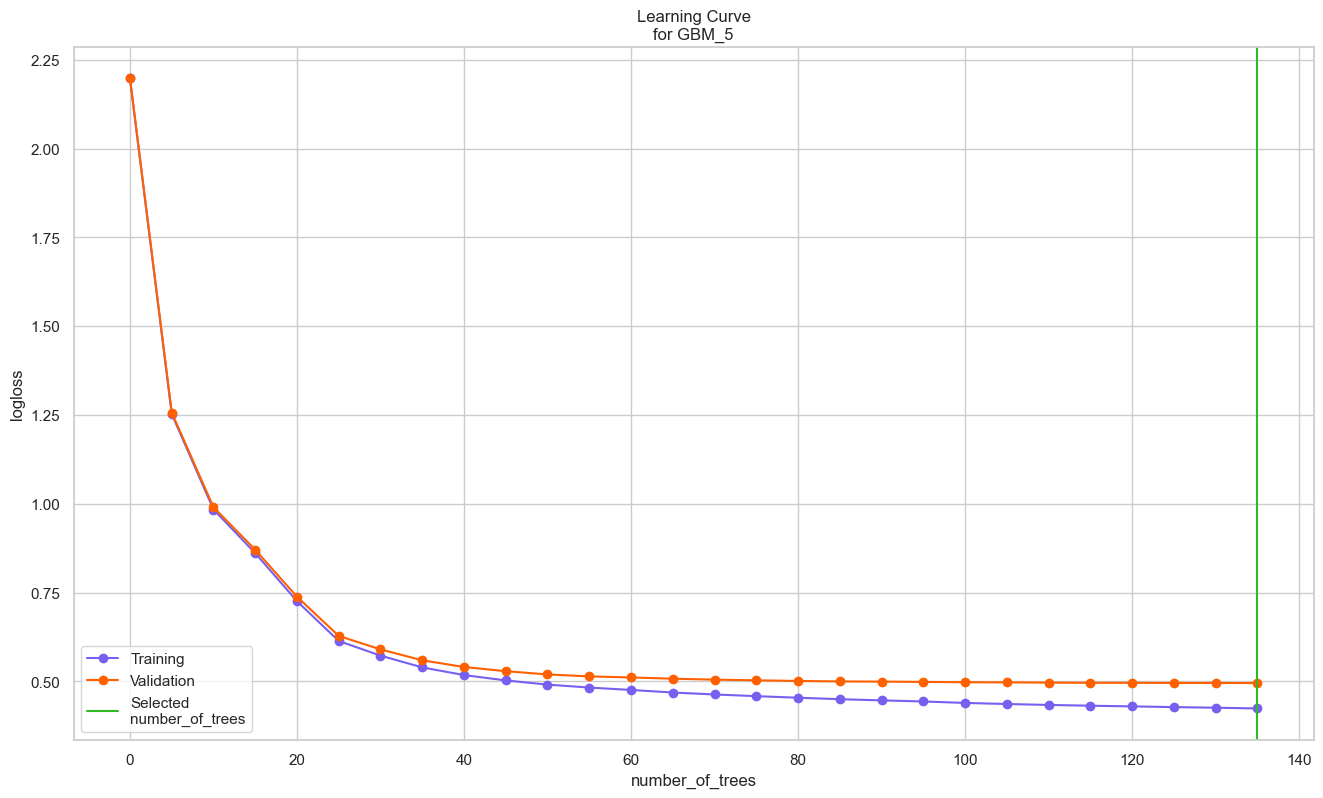

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

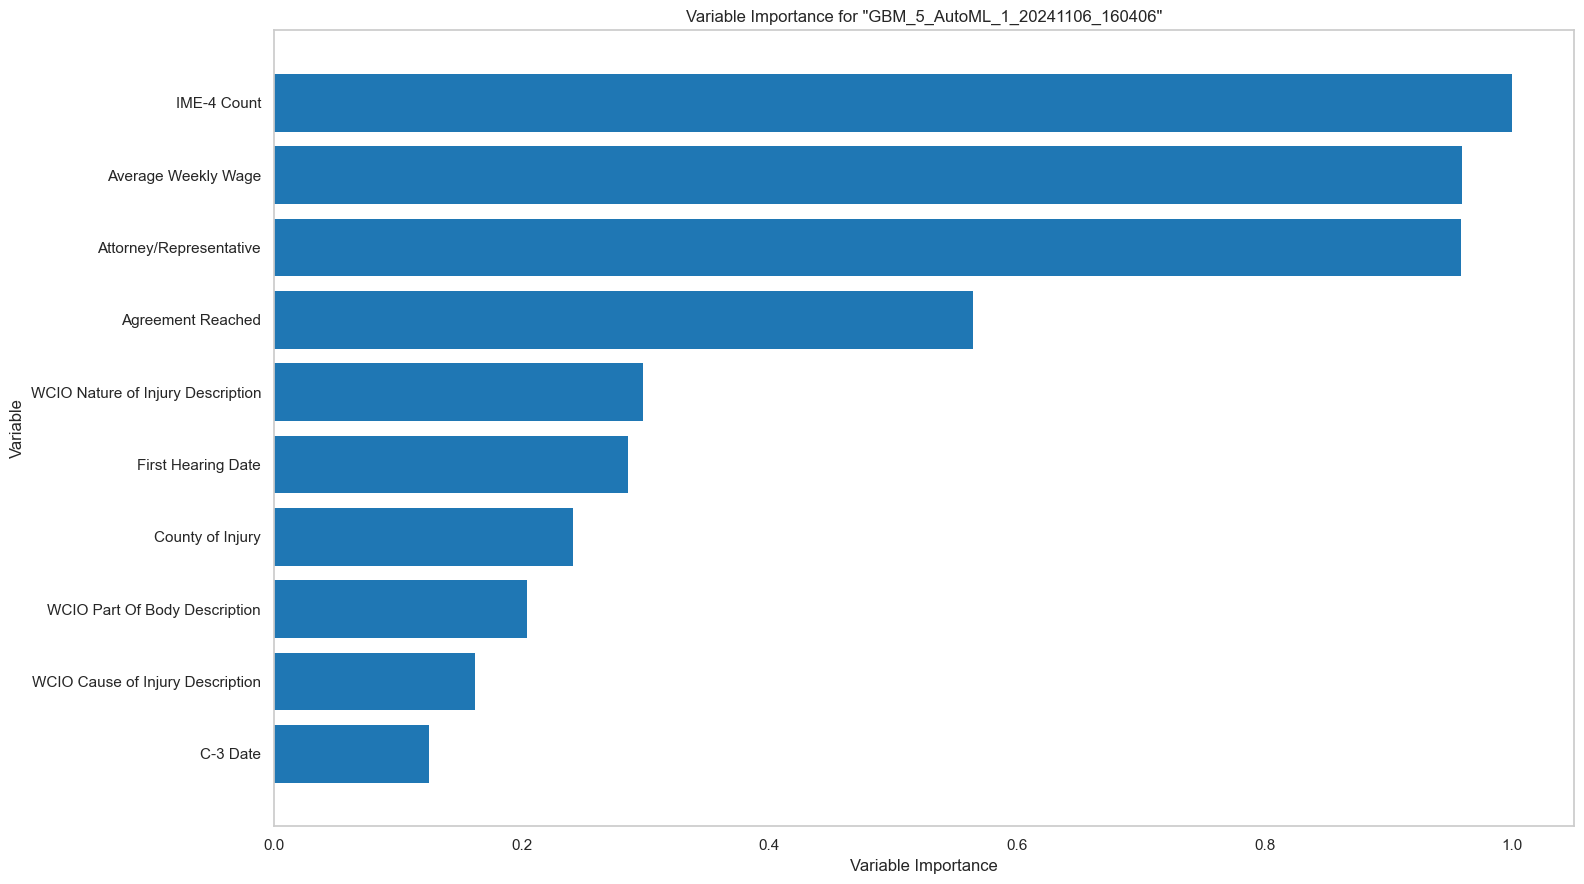

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

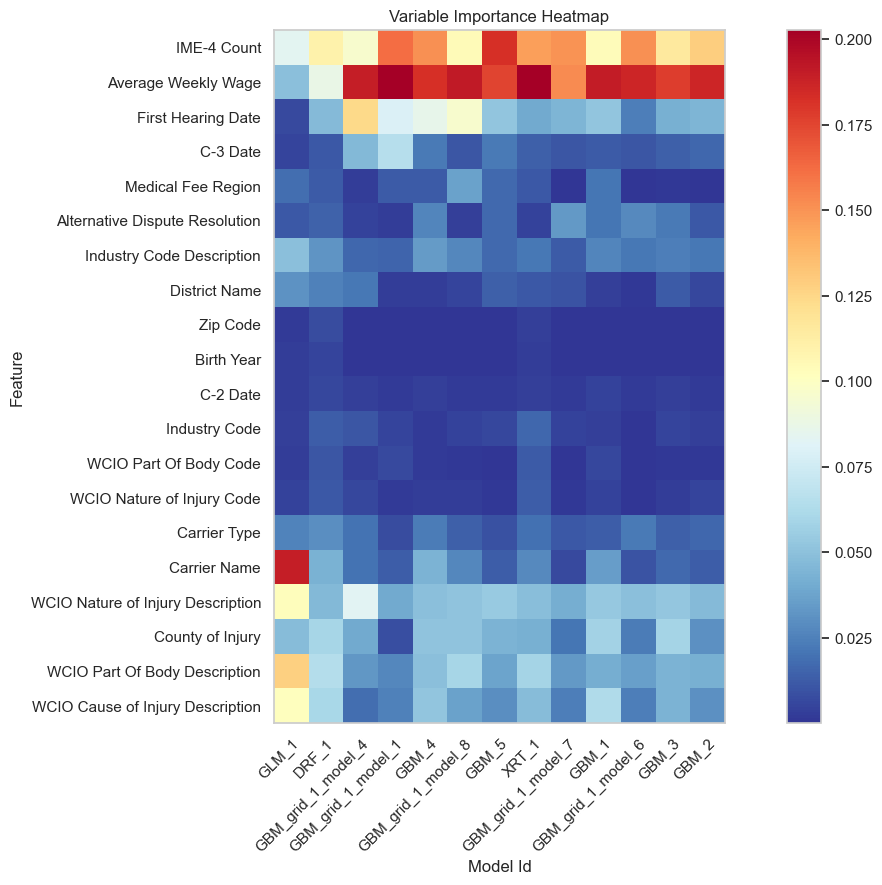

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

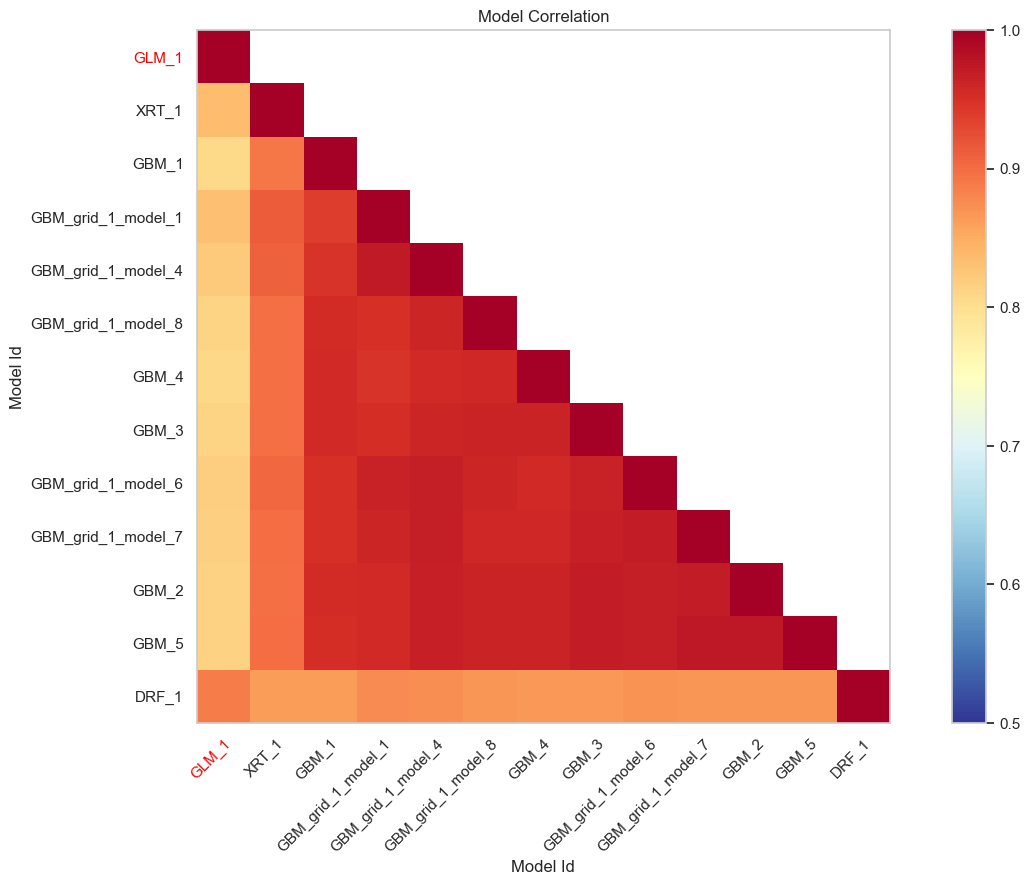

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

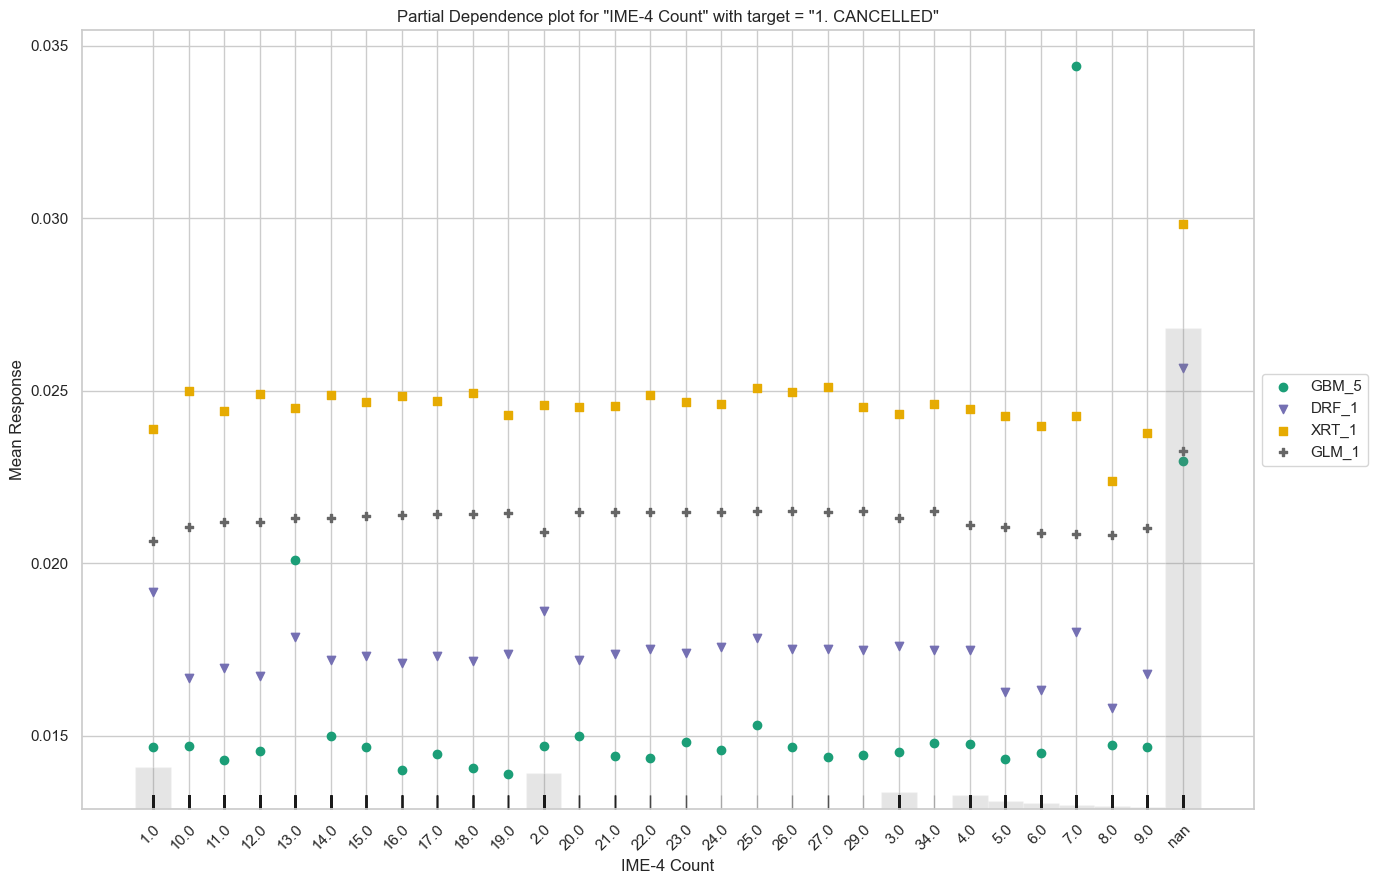

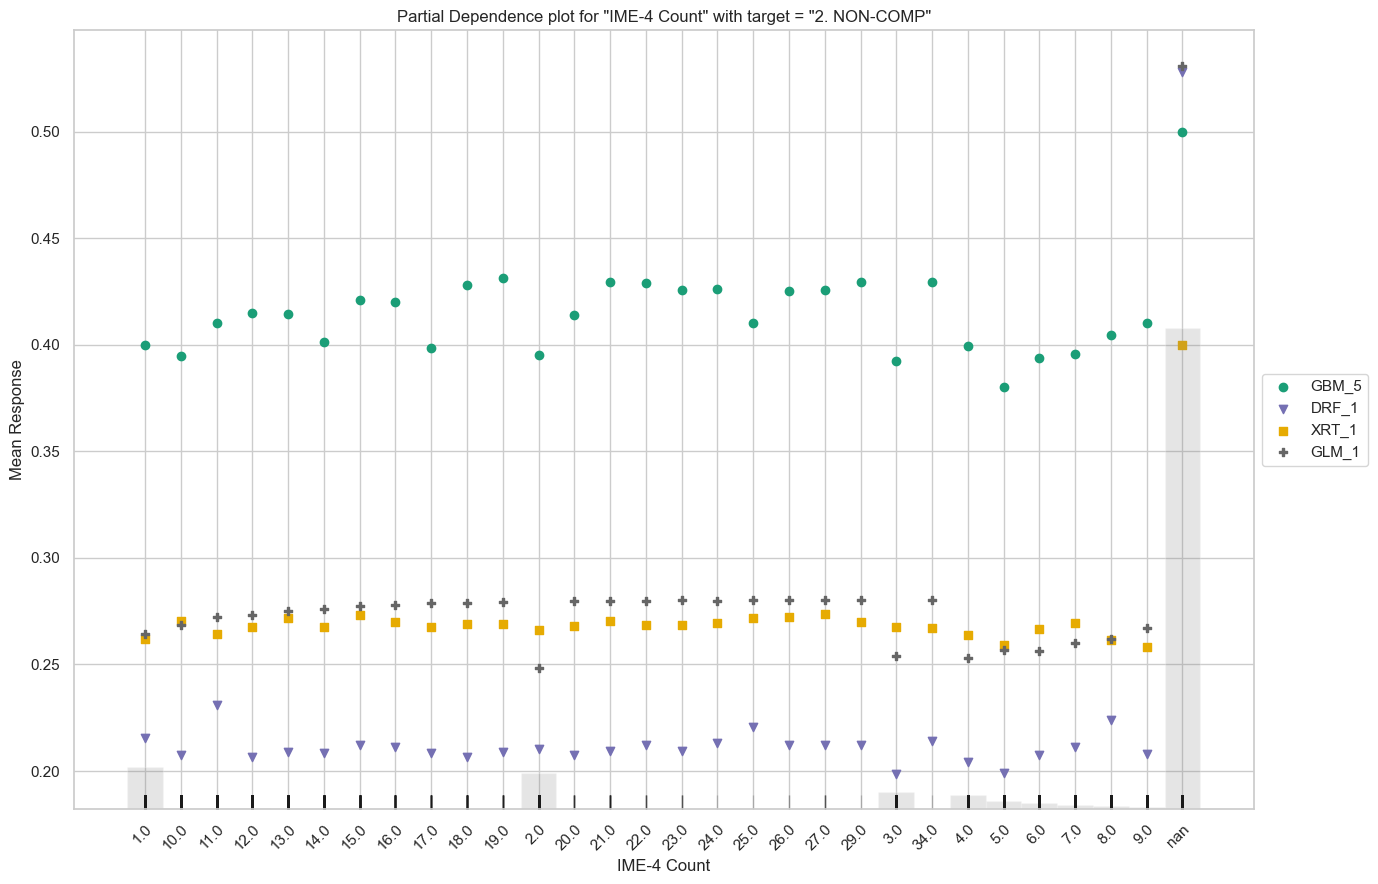

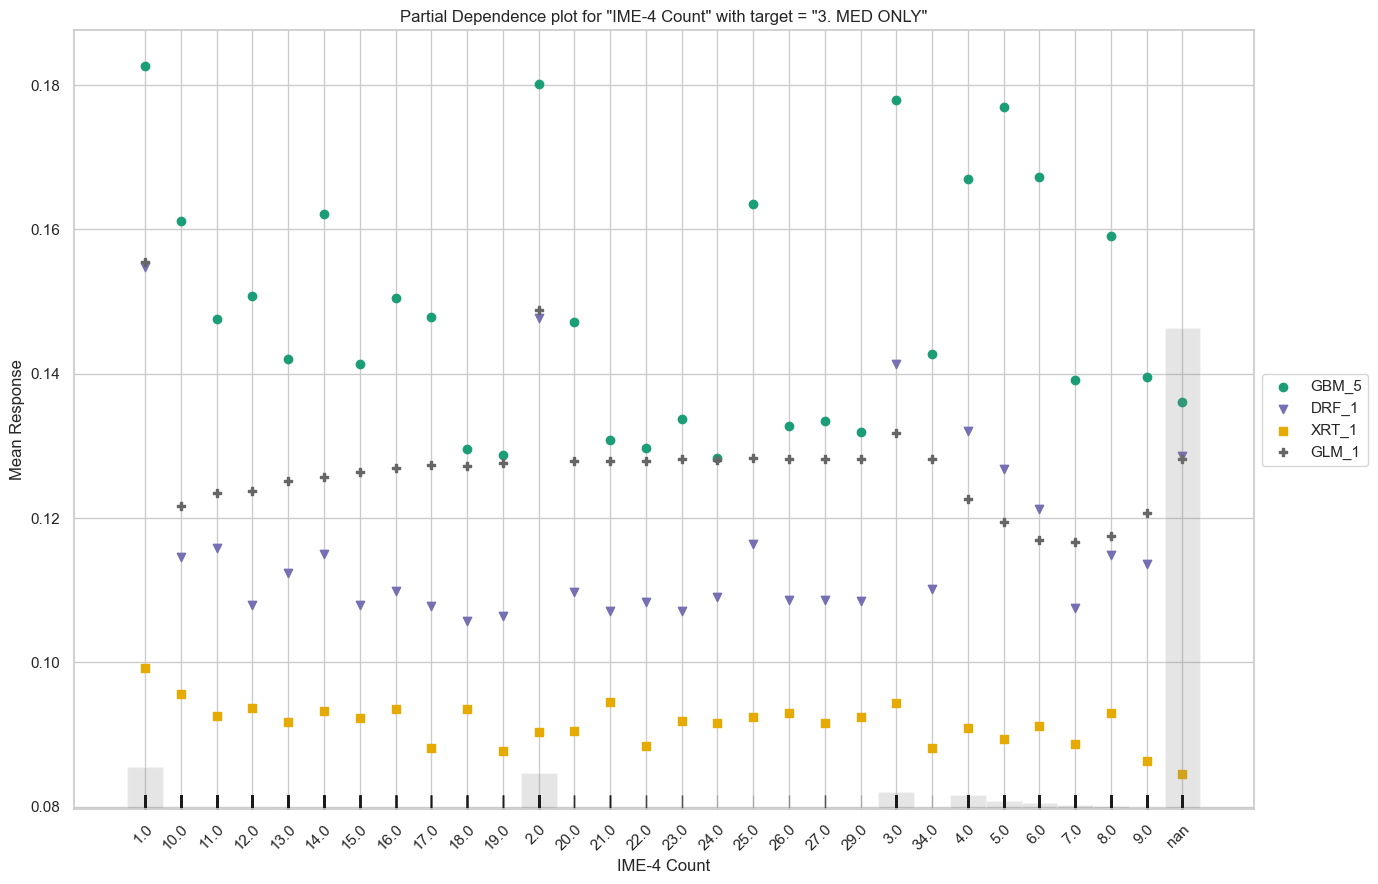

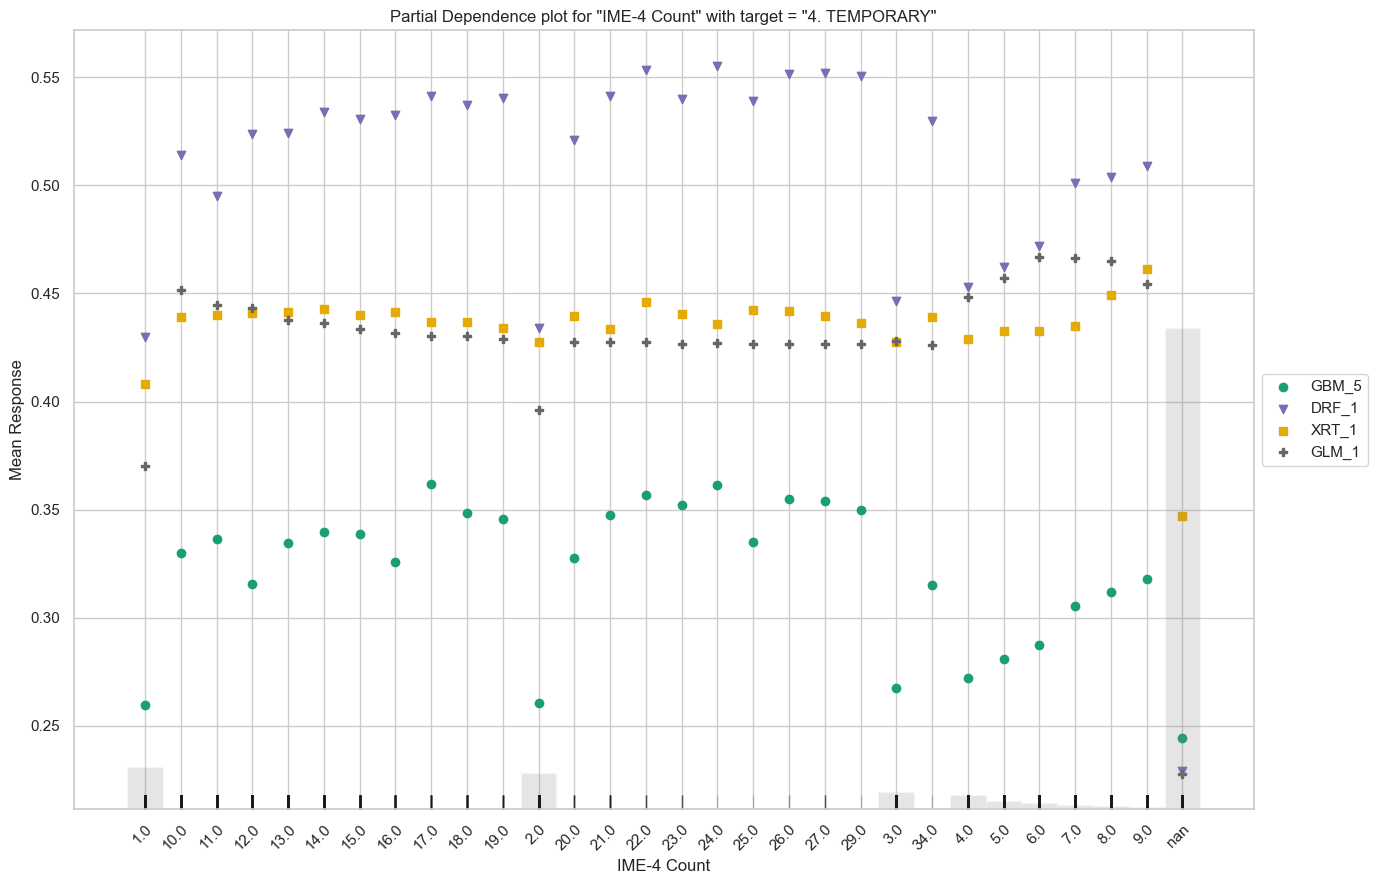

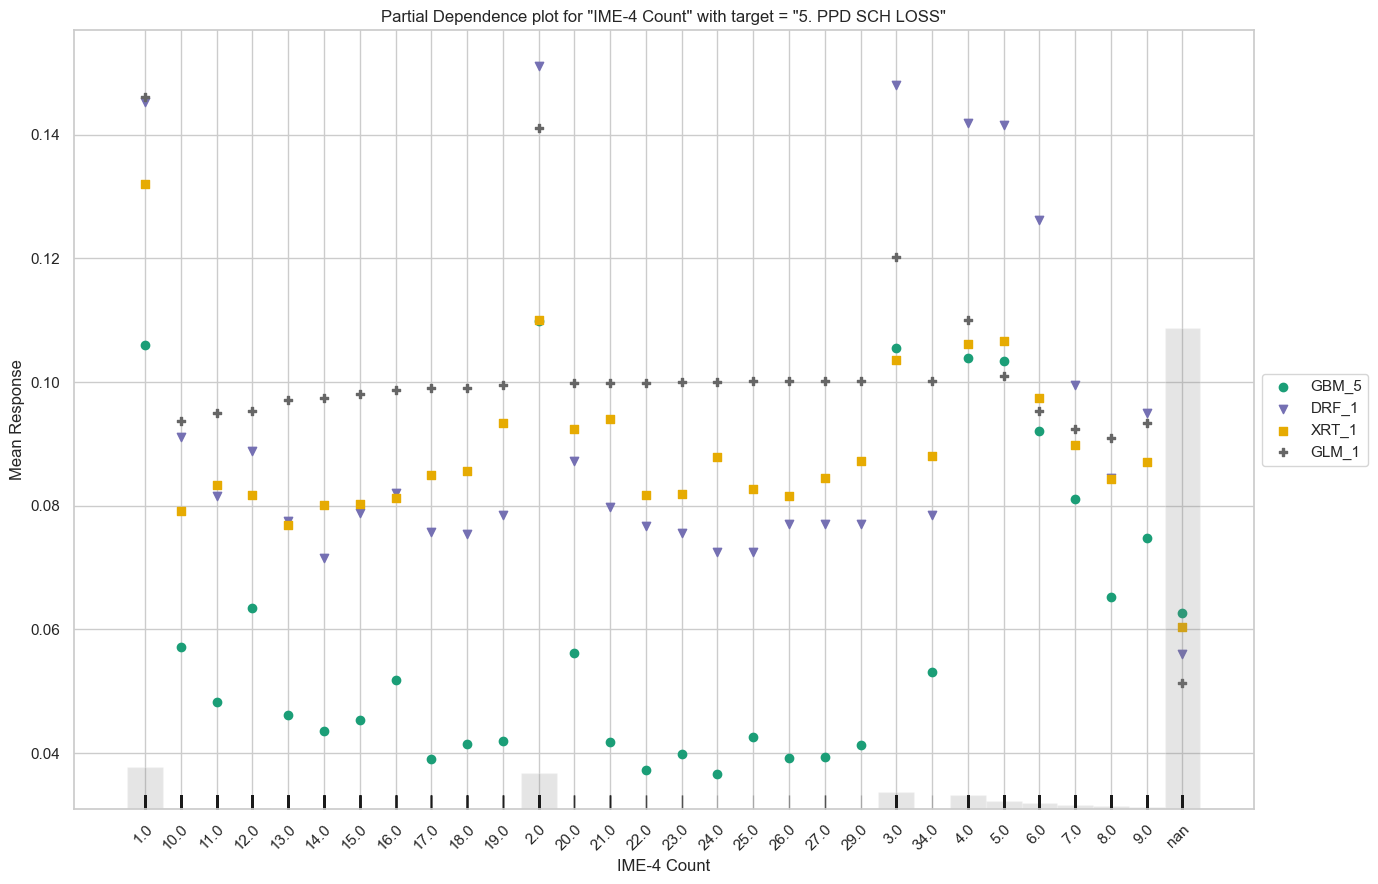

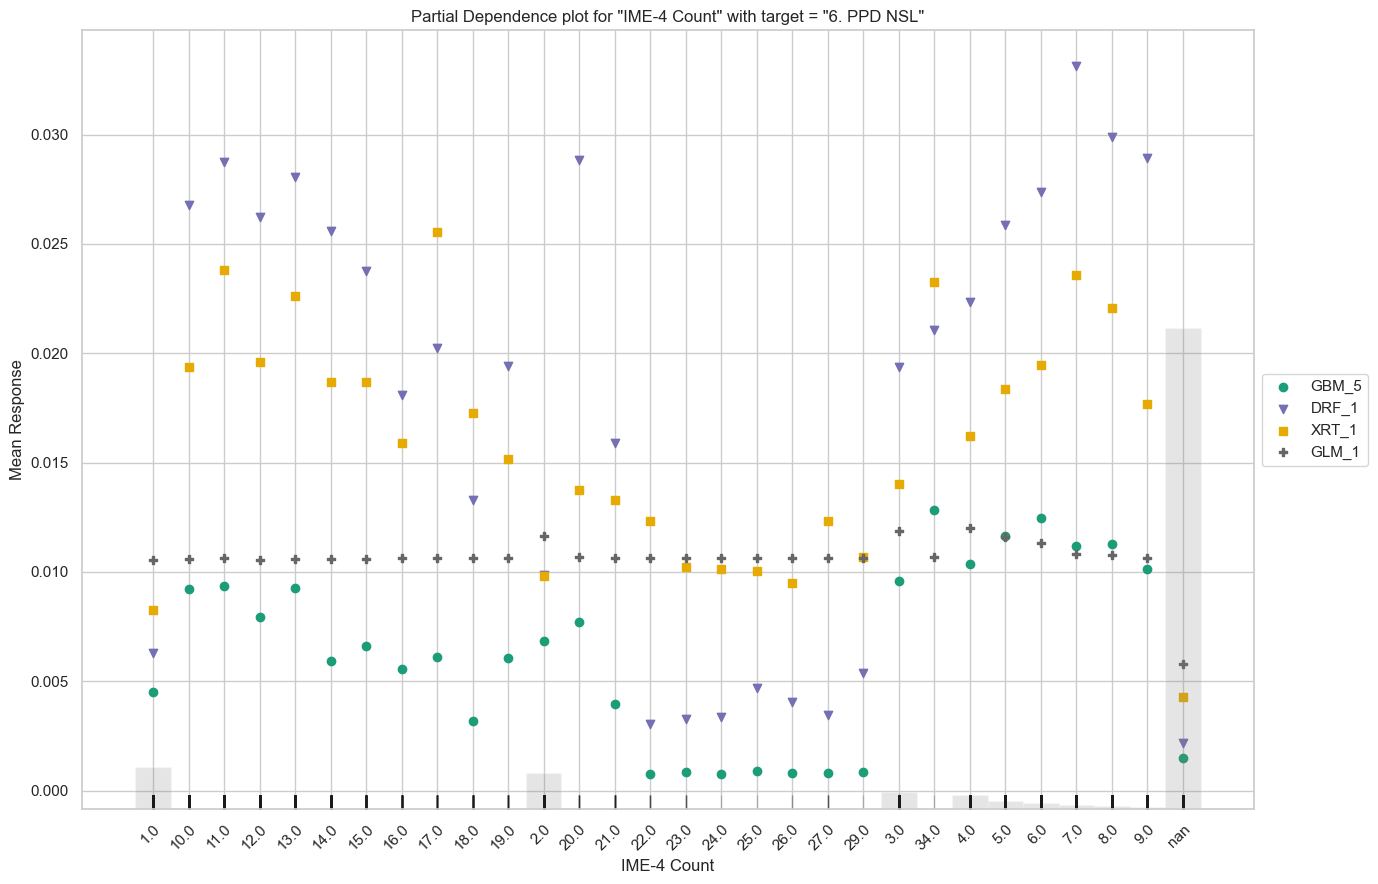

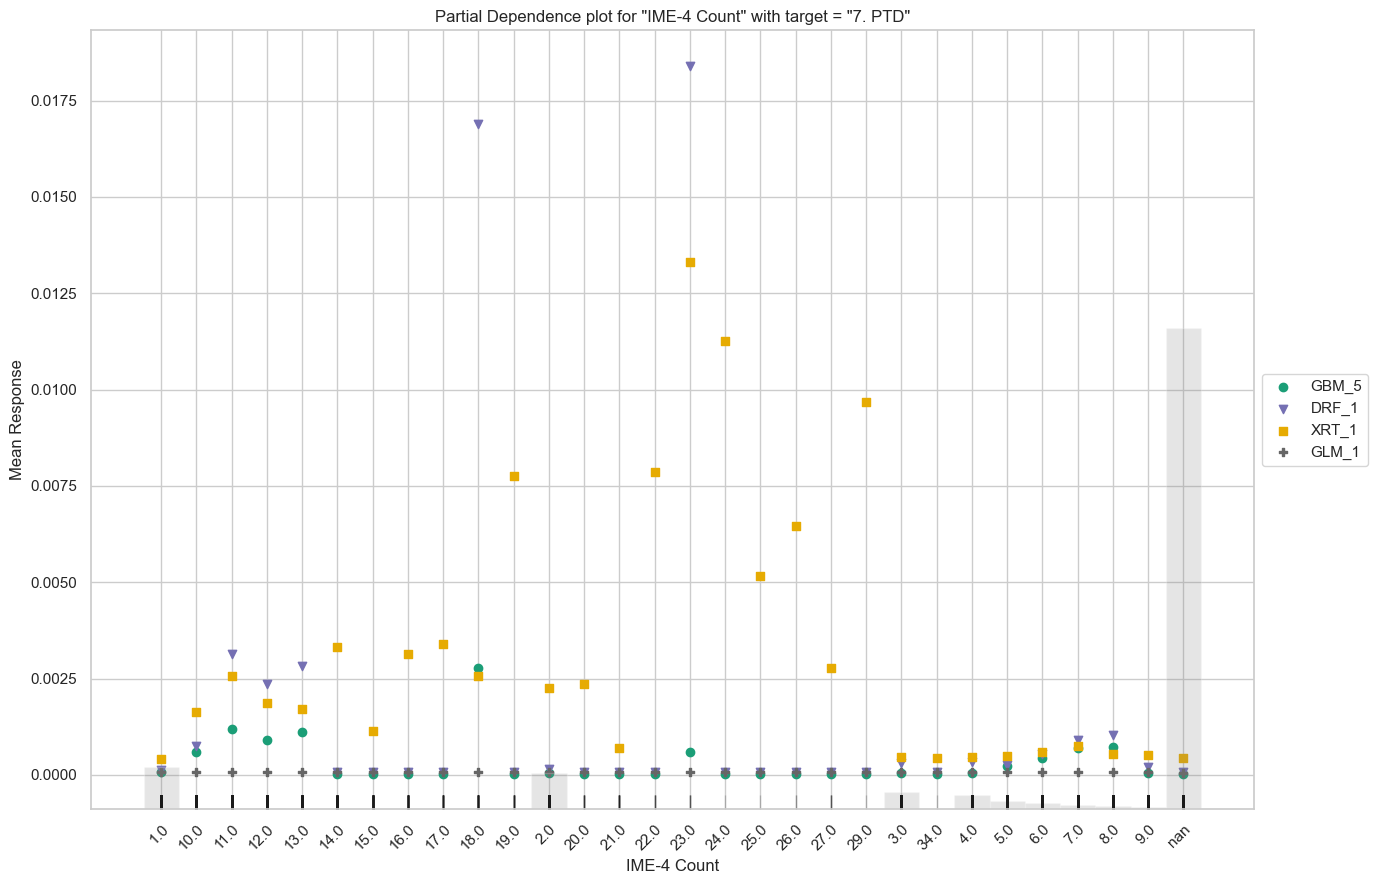

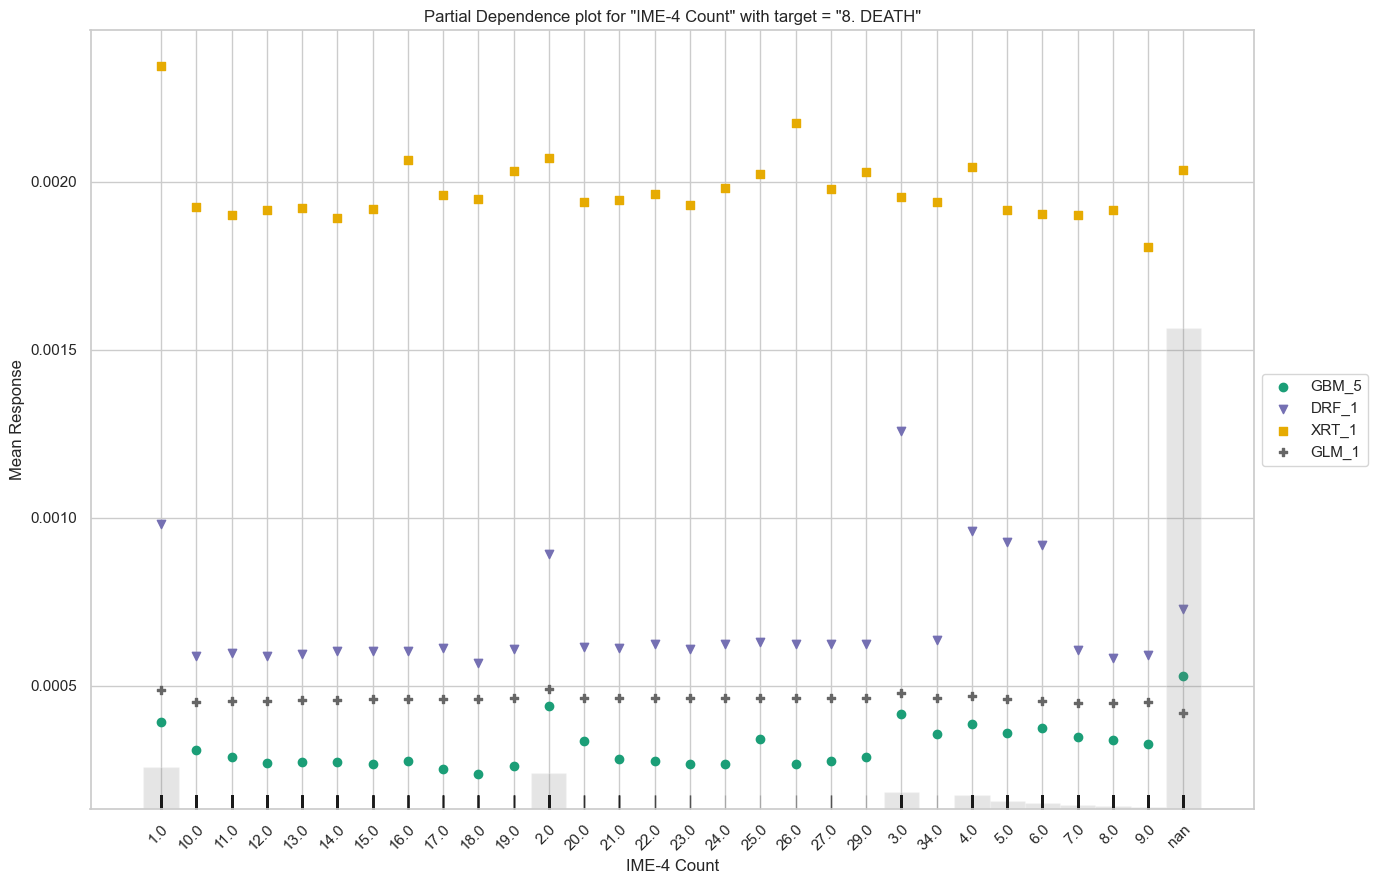

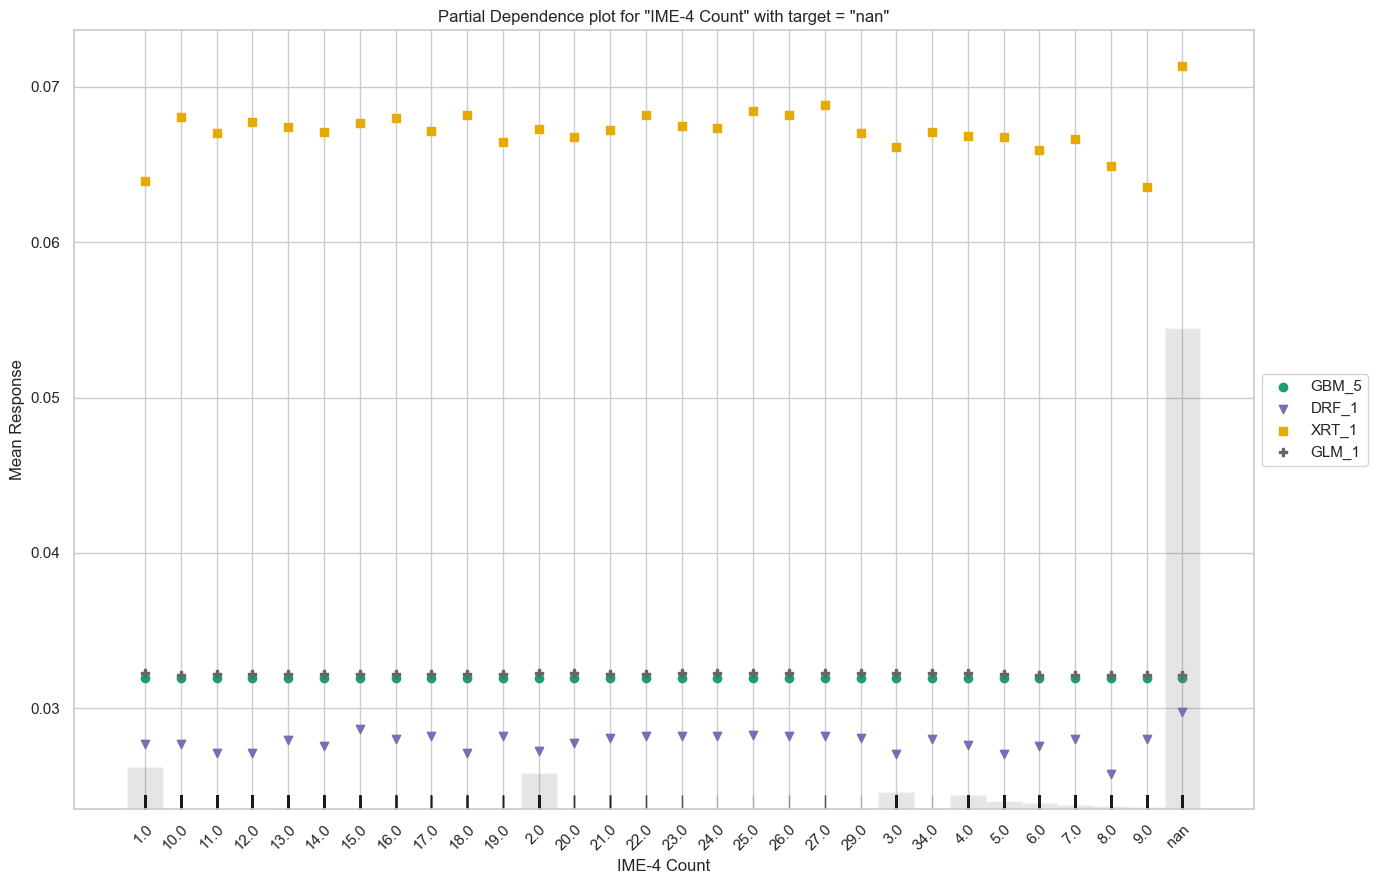

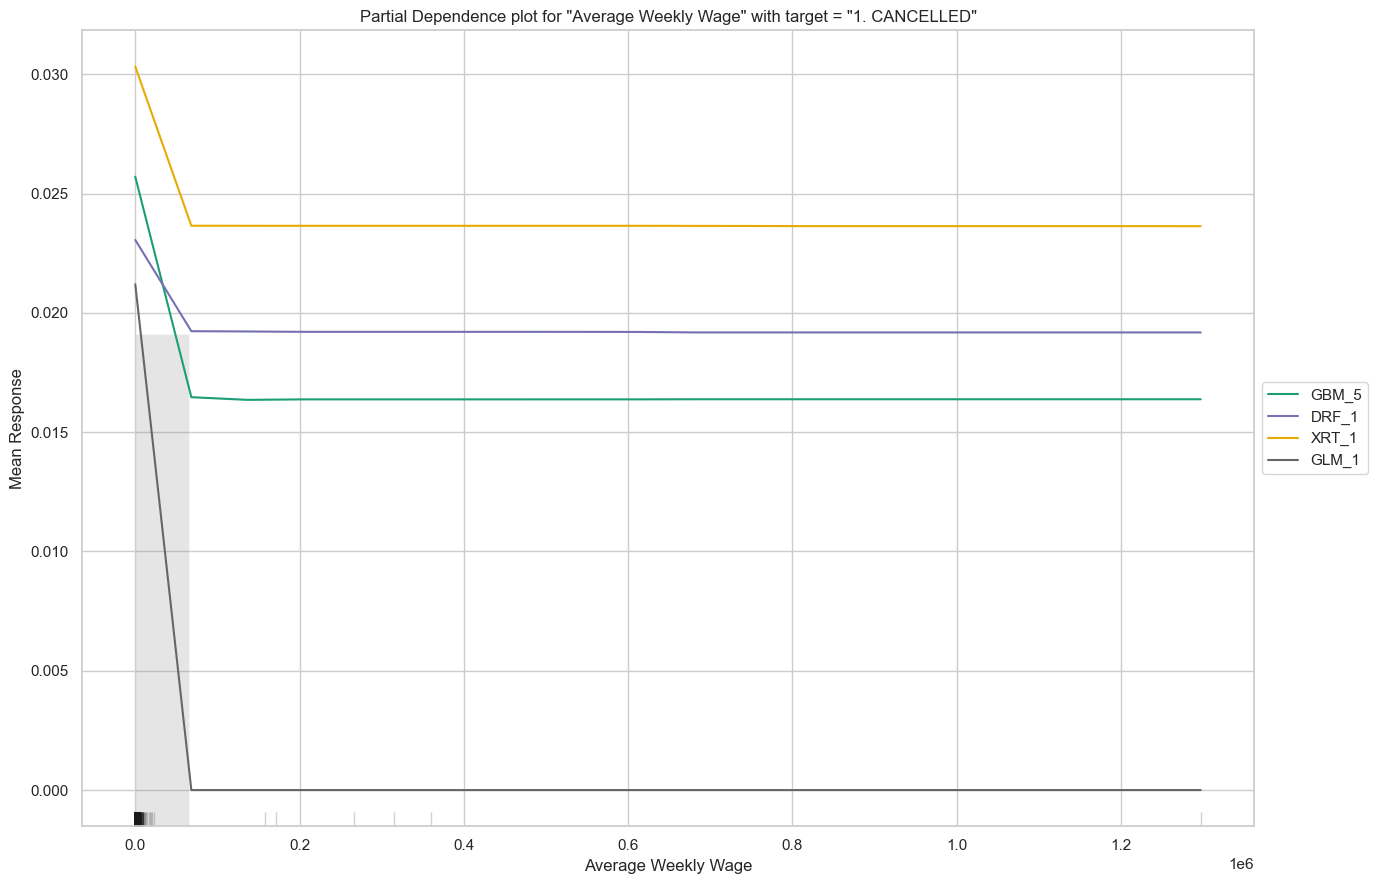

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_af7d41cdeaca6e75156ae2d4bd5a404f> was cancelled by the user.

<Figure size 1600x900 with 0 Axes>

In [31]:
aml.explain(validation_frame)